<a href="https://colab.research.google.com/github/jimsjoo/finance/blob/master/ALGO_MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Money flow index strategy to determine when to buy and sell stock
The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

Unlike conventional oscillators such as the Relative Strength Index (RSI), the Money Flow Index incorporates both price and volume data, as opposed to just price. For this reason, some analysts call MFI the volume-weighted RSI.


In [ ]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
ticker = 'AAPL'
df = web.DataReader(ticker, data_source='yahoo',start='2010-10-01', end='2011-09-09')

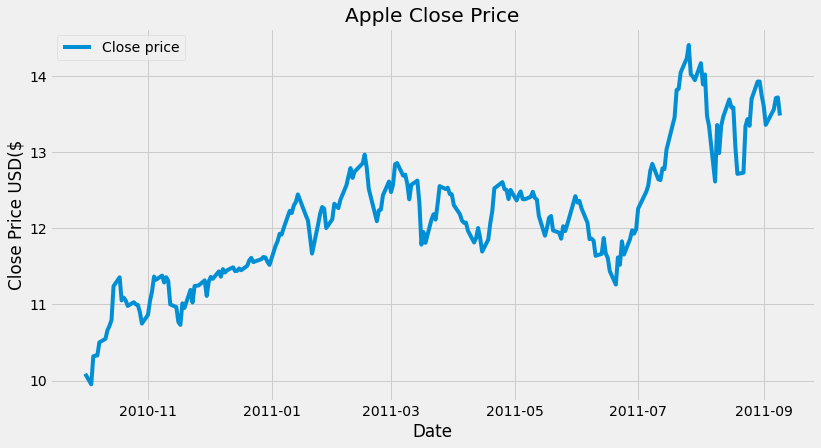

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2, 6.4))
plt.plot(df['Close'], label='Close price')
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($')
plt.legend(loc='upper left')
plt.show()

In [ ]:
typical_price = (df['Close']+df['High']+df['Low'])/3
period=14

In [ ]:
money_flow = typical_price*df['Volume']
money_flow

Date
2010-10-01    4.537179e+09
2010-10-04    4.349444e+09
2010-10-05    5.140443e+09
2010-10-06    6.919852e+09
2010-10-07    4.213371e+09
                  ...     
2011-09-02    5.872798e+09
2011-09-06    6.835718e+09
2011-09-07    4.805949e+09
2011-09-08    5.722475e+09
2011-09-09    7.655236e+09
Length: 238, dtype: float64

In [ ]:
positive_flow = []
negative_flow = []

for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:   
    positive_flow.append(0)
    negative_flow.append(money_flow[i-1])
  else:
    positive_flow.append(0)
    negative_flow.append(0)    

In [ ]:
positive_mf = []
negative_mf = []

for i in range( period-1, len( positive_flow ) ):
  positive_mf.append( sum( positive_flow[ i+1-period : i+1 ] ) )

for i in range( period-1, len( negative_flow ) ):
  negative_mf.append( sum( negative_flow[ i+1-period : i+1 ] ) )  

In [ ]:
mfi = 100 * ( np.array( positive_mf ) / ( np.array( positive_mf ) + np.array( negative_mf ) ) )

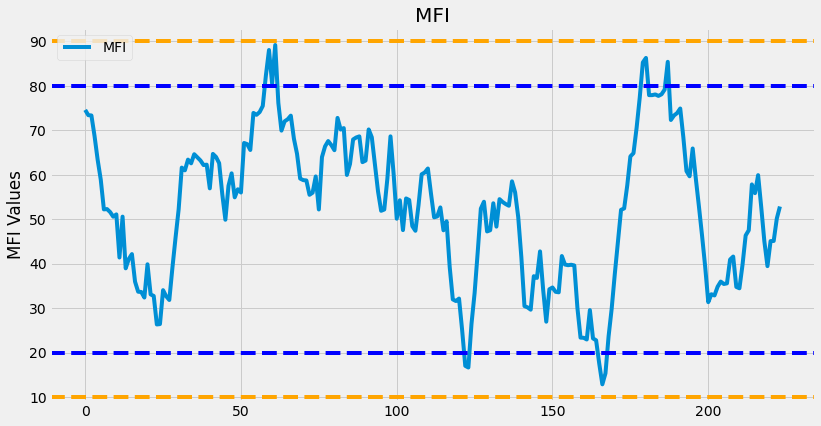

In [ ]:
df2 = pd.DataFrame()
df2['MFI'] = mfi
plt.figure( figsize=(12.2, 6.4) )
plt.plot( df2['MFI'], label='MFI' )
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(loc='upper left')
plt.show()

In [ ]:
new_df = pd.DataFrame()
new_df =  df[period:]
new_df['MFI'] = mfi
new_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2010-10-21,11.240714,10.957143,11.155714,11.054286,551460000,9.552444,74.607406
2010-10-22,11.072857,10.939285,11.038215,10.981071,372778000,9.489175,73.428751
2010-10-25,11.128572,11.015715,11.038929,11.030000,392462000,9.531454,73.362035
2010-10-26,11.062143,10.916072,10.959642,11.001785,392929600,9.507076,68.747049
2010-10-27,11.067857,10.914286,10.987500,10.993929,399002800,9.500285,63.404259
...,...,...,...,...,...,...,...
2011-09-02,13.500000,13.279643,13.383572,13.358929,438939200,11.543972,39.477094
2011-09-06,13.583215,13.088572,13.120358,13.562143,509698000,11.719580,45.103598
2011-09-07,13.771428,13.642858,13.770000,13.711785,350576800,11.848891,45.138120


In [ ]:
def get_signal(data, high, low):
  buy_signal=[]
  sell_signal=[]
  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:     
      sell_signal.append(np.nan)
      buy_signal.append(data['Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)  
  return (buy_signal,sell_signal)      

In [ ]:
new_df['Buy'] = get_signal(new_df, 80,20)[0]
new_df['Sell'] = get_signal(new_df,80,20)[1]

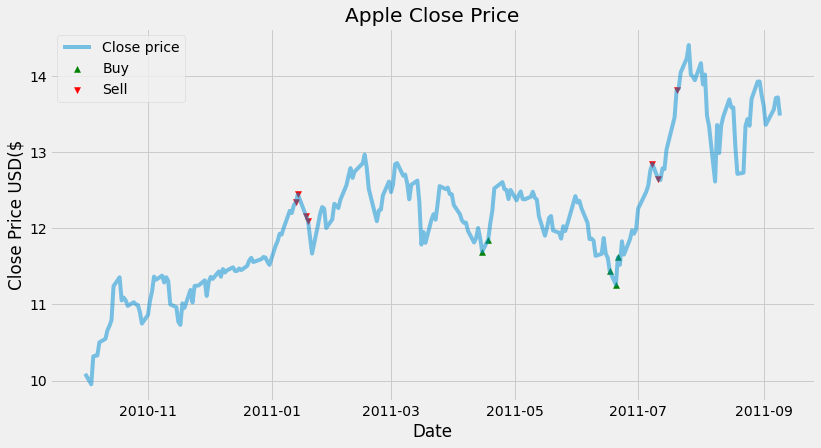

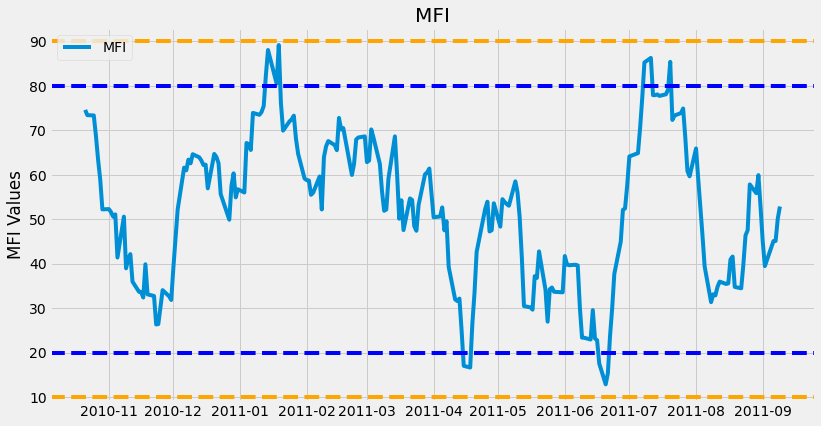

In [ ]:
plt.figure(figsize=(12.2, 6.4))
plt.plot(df['Close'], label='Close price', alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color='red', label='Sell', marker='v', alpha=1)
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($')
plt.legend(loc='upper left')
plt.show()

plt.figure( figsize=(12.2, 6.4) )
plt.plot( new_df['MFI'], label='MFI' )
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(loc='upper left')
plt.show()